## Importing Libraries

In [1]:
from sklearn.datasets import load_breast_cancer # Import the breast cancer data
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from tabulate import tabulate

## Load Data

In [2]:
# Load breact cancer data from sklearn.datasets to breast_cancer_data
breast_cancer_data = load_breast_cancer()

## Inspect Data Names

In [3]:
# Print feature names
for feature_name in breast_cancer_data.feature_names:
    print(feature_name)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


In [47]:
# Data to display in the table
data = [(value, label) for value, label in enumerate(breast_cancer_data.target_names)]

# Table headers
headers = ["Numeric Value", "Label"]

# Print the table
table = tabulate(data, headers, tablefmt="fancy_grid")
print(table)

╒═════════════════╤═══════════╕
│   Numeric Value │ Label     │
╞═════════════════╪═══════════╡
│               0 │ malignant │
├─────────────────┼───────────┤
│               1 │ benign    │
╘═════════════════╧═══════════╛


In [5]:
# Split the data into training and validation sets
training_data, validation_data, training_labels, validation_labels = train_test_split(
    breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

# Confirm the size of training_data and training_labels
print(len(training_data))
print(len(training_labels))

## K Nearest Neighbors Classification

### Train and Test Classifier on Validation Set

In [24]:
# Create a KNeighborsClassifier with n_neighbors = 3
classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
classifier.fit(training_data, training_labels)

# Test accuracy on the validation set
accuracy = classifier.score(validation_data, validation_labels)
print(f"Accuracy for {classifier.n_neighbors} neighbors is {round(accuracy, 3)}")

Accuracy for 3 neighbors is 0.947


### Hyperparameter Tuning

In [10]:
# Test different values of k and print validation accuracies
k_list = range(1, 101)  # Values of k from 1 to 100
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracy = classifier.score(validation_data, validation_labels)
    accuracies.append(accuracy)
    print(f'k = {k}: Validation Accuracy = {accuracy}')

k = 1: Validation Accuracy = 0.9298245614035088
k = 2: Validation Accuracy = 0.9385964912280702
k = 3: Validation Accuracy = 0.9473684210526315
k = 4: Validation Accuracy = 0.9473684210526315
k = 5: Validation Accuracy = 0.9473684210526315
k = 6: Validation Accuracy = 0.9473684210526315
k = 7: Validation Accuracy = 0.9473684210526315
k = 8: Validation Accuracy = 0.9473684210526315
k = 9: Validation Accuracy = 0.956140350877193
k = 10: Validation Accuracy = 0.956140350877193
k = 11: Validation Accuracy = 0.956140350877193
k = 12: Validation Accuracy = 0.956140350877193
k = 13: Validation Accuracy = 0.956140350877193
k = 14: Validation Accuracy = 0.956140350877193
k = 15: Validation Accuracy = 0.956140350877193
k = 16: Validation Accuracy = 0.956140350877193
k = 17: Validation Accuracy = 0.956140350877193
k = 18: Validation Accuracy = 0.956140350877193
k = 19: Validation Accuracy = 0.956140350877193
k = 20: Validation Accuracy = 0.956140350877193
k = 21: Validation Accuracy = 0.956140350

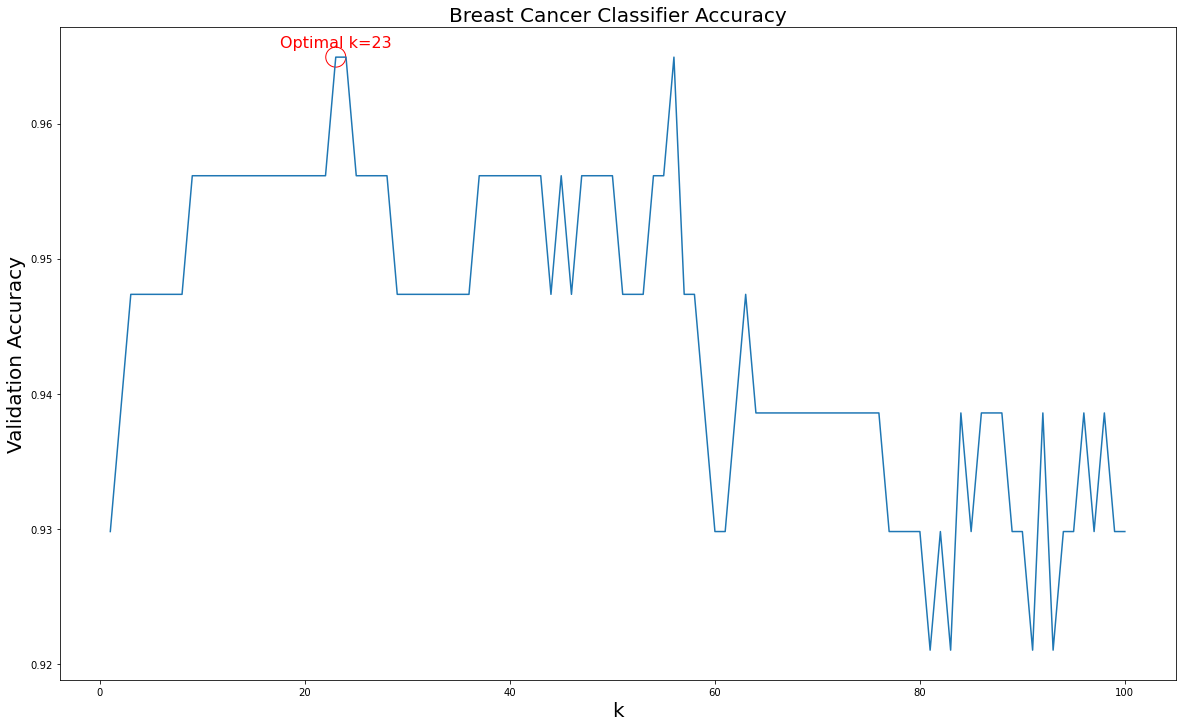

Optimal k: 23
Max Validation Accuracy: 0.965


In [43]:
# Find the maximum accuracy and its corresponding k
max_accuracy = max(accuracies)
optimal_k = k_list[accuracies.index(max_accuracy)]

# Plot the validation accuracies with the identified optimal k
plt.figure(figsize=(20, 12))
plt.plot(k_list, accuracies)
plt.xlabel('k', fontsize=20)
plt.ylabel('Validation Accuracy', fontsize=20)
plt.title('Breast Cancer Classifier Accuracy', fontsize=20)

# Mark the optimal k point on the plot
plt.scatter(optimal_k, max_accuracy, marker='o', edgecolor='red', facecolor='none', s=400)
plt.annotate(f'Optimal k={optimal_k}', (optimal_k, max_accuracy), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=16, color='red')

plt.show()

# Output optimal k and max validation accuracy in text form
print(f'Optimal k: {optimal_k}')
print(f'Max Validation Accuracy: {max_accuracy:.3f}')
